In [1]:
import pandas as pd
from astropy.io import fits
import astropy
import astropy.constants as c
import numpy as np
import pandas as pd
from sncosmo import read_snana_fits
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

from elasticc_for_etienne import *


In [ ]:
head = '/media/ELAsTICC/data/training_sample/ELASTICC_TRAIN_SNIa-91bg/ELASTICC_TRAIN_NONIaMODEL0-0001_HEAD.FITS.gz'
phot = '/media/ELAsTICC/data/training_sample/ELASTICC_TRAIN_SNIa-91bg/ELASTICC_TRAIN_NONIaMODEL0-0001_PHOT.FITS.gz'
lcs = read_snana_fits(head, phot)

## Find the winnner

In [ ]:
sizes = []

for i in lcs:
    sizes.append(len(i['PHOTFLAG'][i['PHOTFLAG']!=0]))
    
rows = np.arange(0, len(lcs))
order_sizes, order_rows = zip(*sorted(zip(sizes, rows), reverse=True))

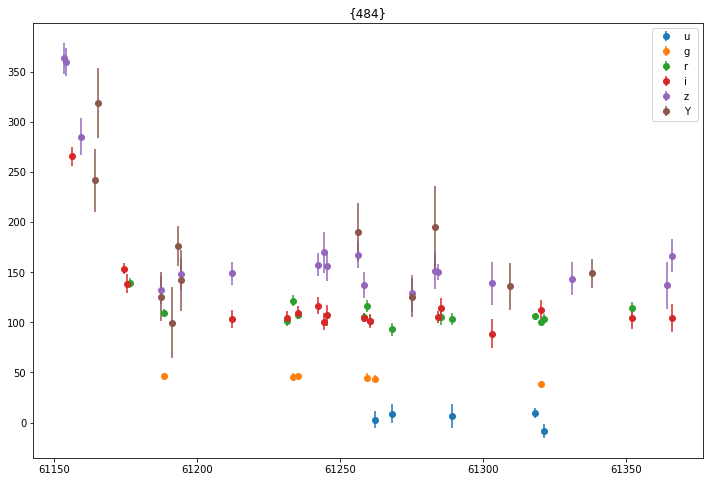

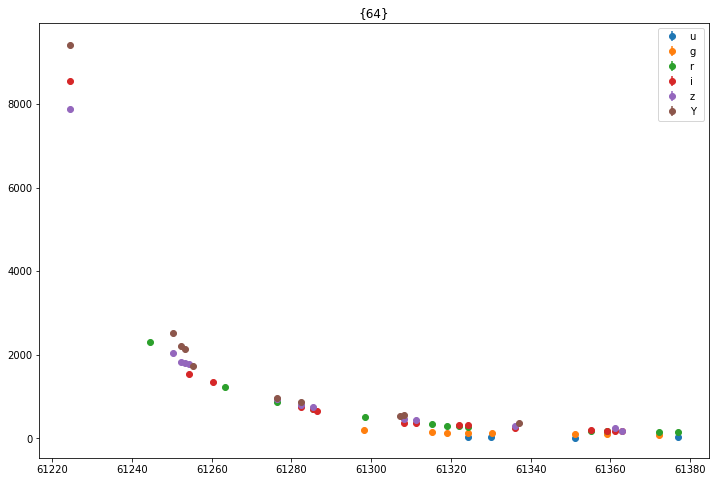

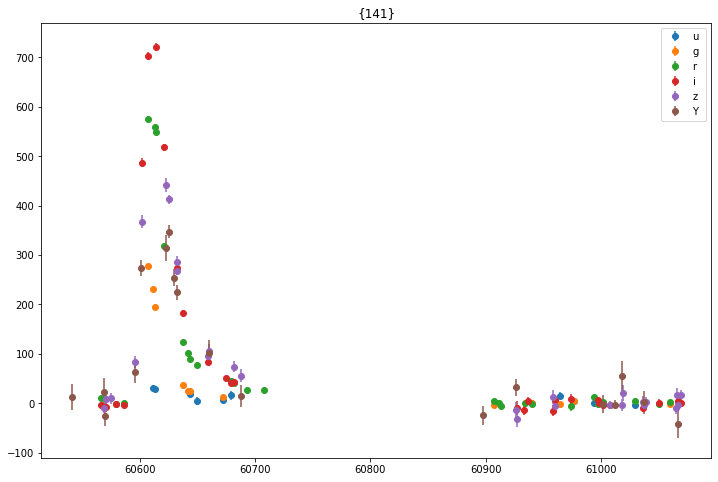

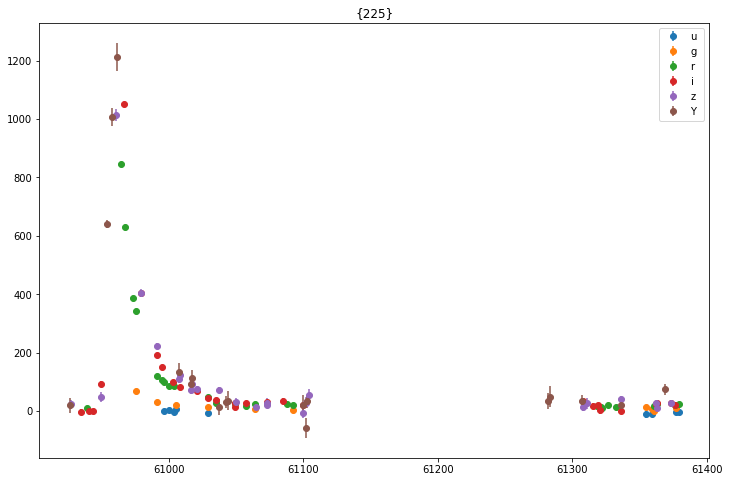

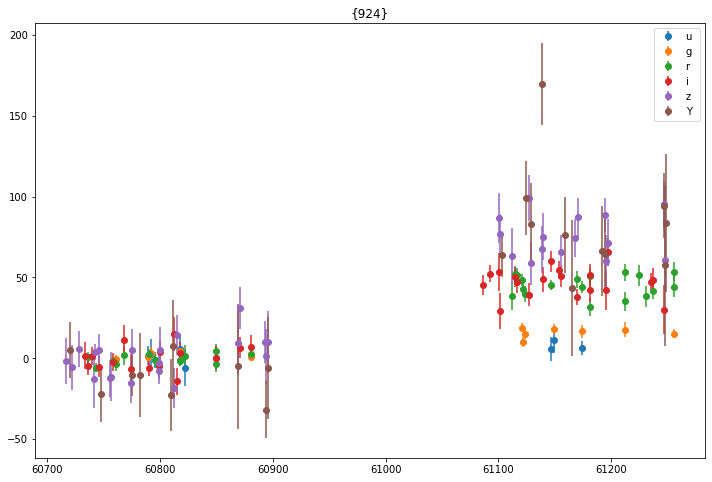

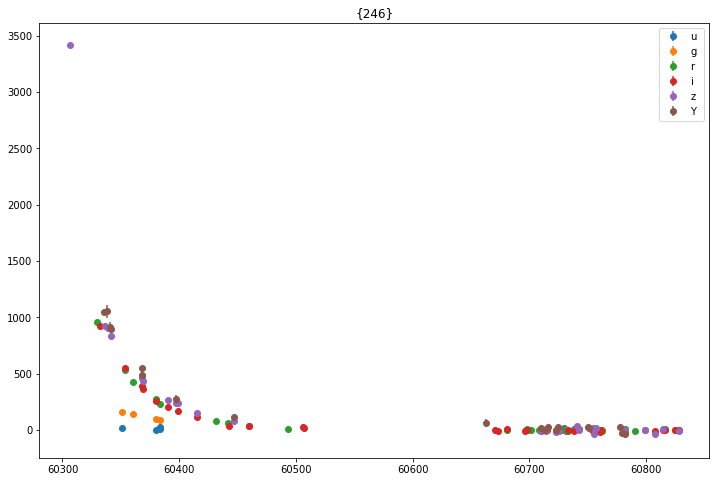

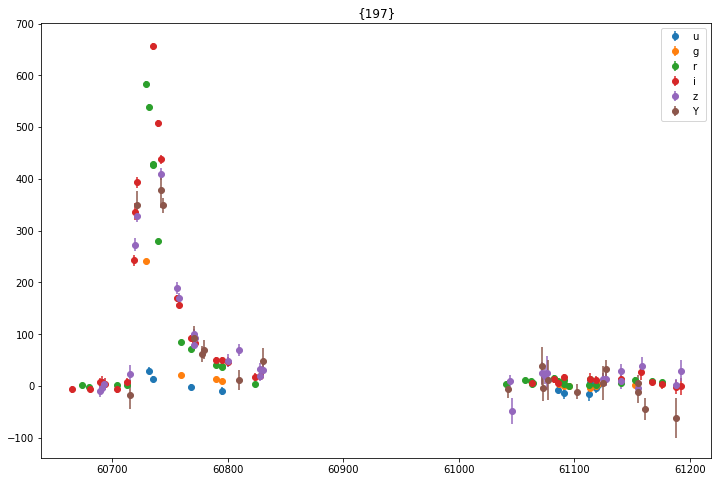

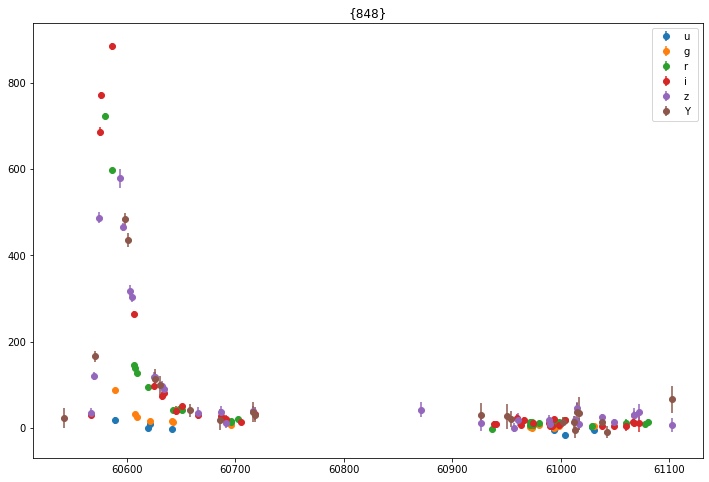

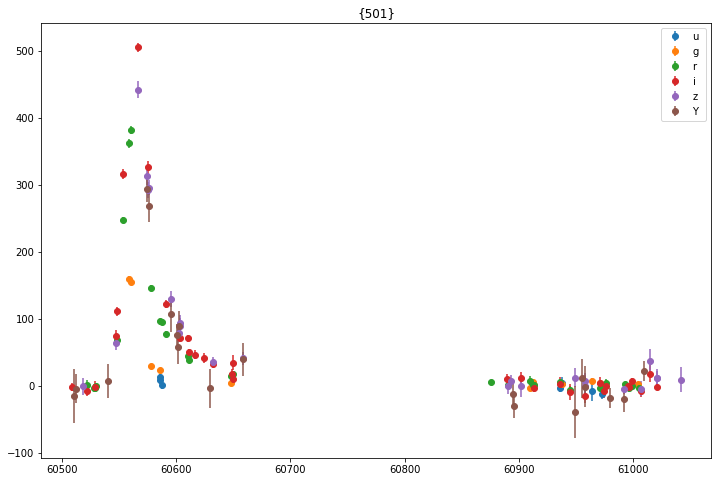

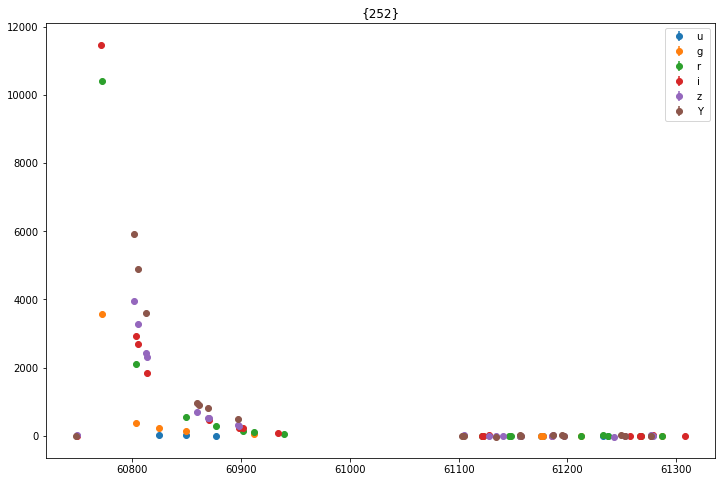

In [7]:
batch = 0
batch_size = 10

for obj in order_rows[batch*batch_size : batch*batch_size + batch_size]:
    
    plt.figure(figsize = (12, 8))
    
    for band in ['u ','g ','r ','i ','z ','Y ']:

        
        single = lcs[obj]#[lcs[obj]['PHOTFLAG']!=0]
        
        single_band = single[single['BAND'] == band]
        flux = single_band['FLUXCAL']
        fluxerr = single_band['FLUXCALERR']
        mjd = single_band['MJD']

        plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)
        plt.title({obj})
    
        plt.legend()

In [8]:
winner = 225

/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))
/media3/etienne/genetic_env/lib/python3.6/site-packages/iminuit/cost.py:30: RuntimeWarning: overflow encountered in multiply
  return z * z
/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))
/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))
/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:65: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(t - t0) / tfall) / (1 + np.exp((t - t0) / trise))


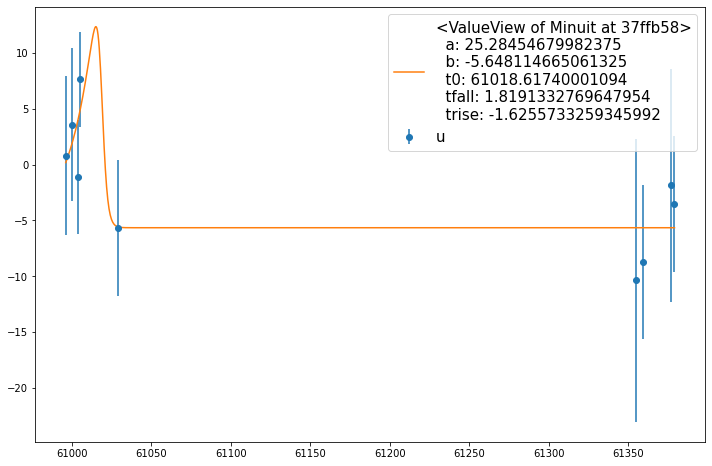

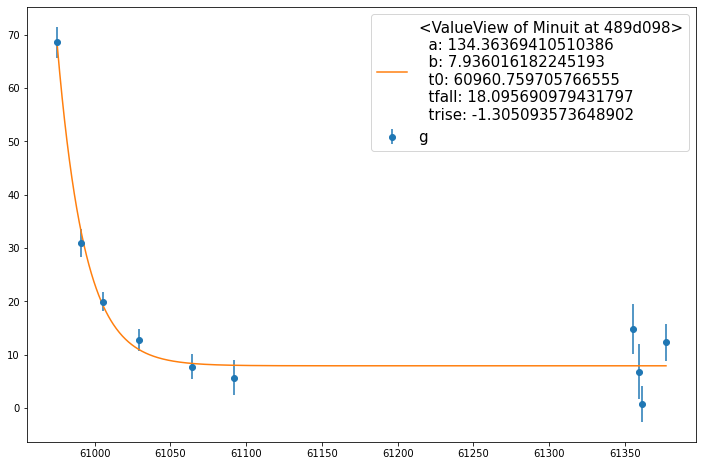

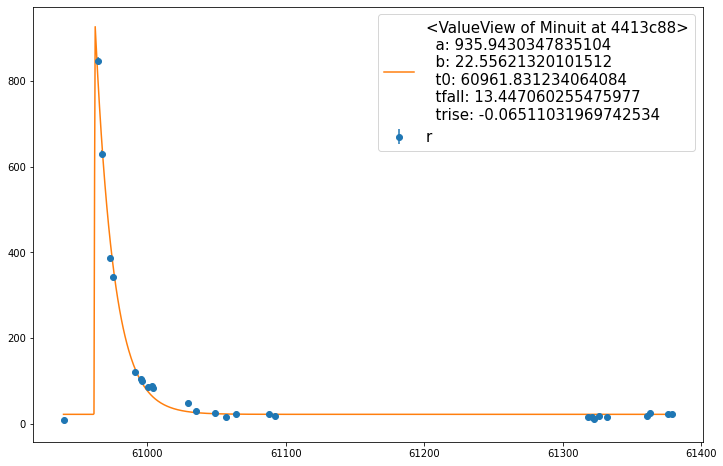

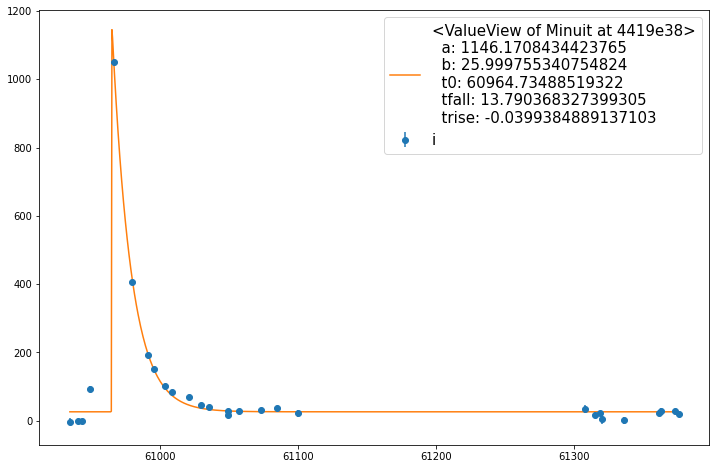

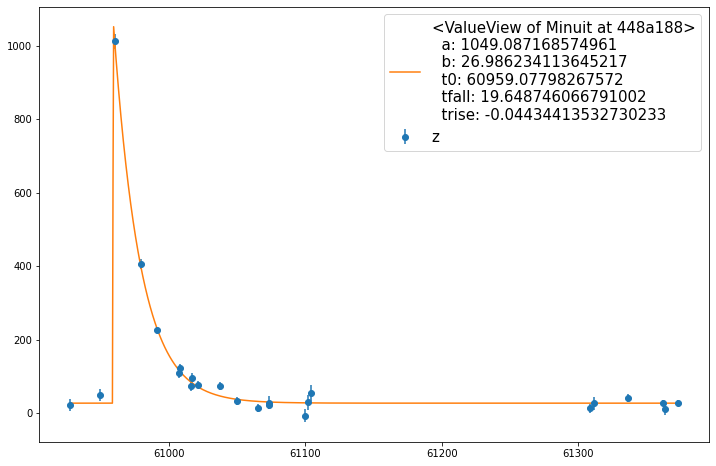

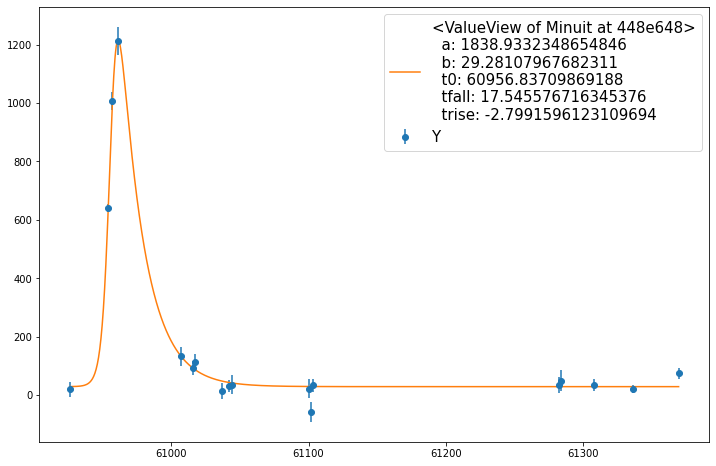

In [9]:
for band in ['u ','g ','r ','i ','z ','Y ']:

    plt.figure(figsize = (12, 8))
    obj = lcs[winner]

    single_band = obj[obj['BAND'] == band]
    flux = single_band['FLUXCAL']
    fluxerr = single_band['FLUXCALERR']
    mjd = single_band['MJD']
    
    x = np.linspace(mjd.min(), mjd.max(), 1000)
        
    parameters_dict = {"a": flux.max(), "b":0, "t0": mjd[np.argmax(flux)], "tfall": 30, "trise":-5}
    least_squares = LeastSquares(mjd, flux, fluxerr, FbazB)
        
    fit = Minuit(least_squares, **parameters_dict)
    fit.migrad()
    
    

    plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)
        
    plt.plot(x, FbazB(x, **fit.values), label=fit.values)
    
    plt.legend(fontsize = 15)

# Create the bolometric flux function (that depends on time and frequency) :

The fit will therefore be in 3D

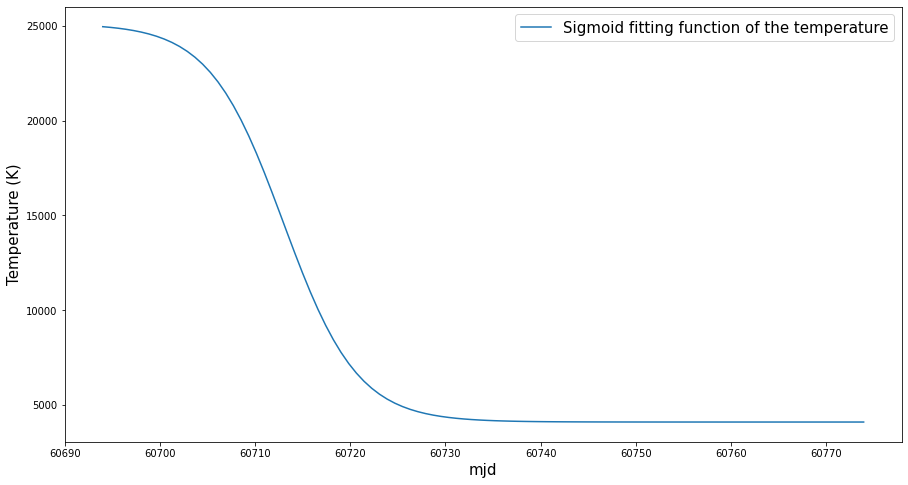

In [10]:
Tmin, Tmax, ksig, tT, t0 = 4.111e3, 21e3, 3.9, -11, 60.72397e3 

x_step = np.linspace(t0-30, t0+50, 100)
plt.figure(figsize = (15, 8))
plt.plot(x_step, Tsig(x_step, Tmin, Tmax, ksig, t0, tT), label='Sigmoid fitting function of the temperature')
plt.xlabel('mjd',fontsize = 15)
plt.ylabel('Temperature (K)',fontsize = 15)
plt.legend(fontsize = 15)

In [11]:
snia = lcs[winner]

freq_dic = {'u ':nu_u, 'g ':nu_g, 'r ':nu_r, 'i ':nu_i, 'z ':nu_z, 'Y ':nu_Y}
snia['NU'] = np.vectorize(freq_dic.get)(list(snia['BAND']))


In [12]:
flux = snia['FLUXCAL']
fluxerr = snia['FLUXCALERR']
nu = snia['NU']
mjd = snia['MJD']
freq = snia['NU']


parameters_dict = {"a": flux.max(), "t0": mjd[np.argmax(flux)], "tT": 0,\
                   "tfall": 30, "trise":-5, "Tmin":4000, "dT":3000, "ksig":4}


#boundaries = {}

least_squares = LeastSquares(np.array([mjd, nu]).T, flux, fluxerr, Fnu)

fit = Minuit(least_squares,
             limit_Tmin=(1000, 50000),
             limit_dT=(0, 100000),
             limit_a=(0, 100000),
             **parameters_dict)

fit.migrad()
#print(fit.FCN)

/media3/etienne/workdir/spark_AGN/ELAsTiCC/Multiple_band_fit/SNAD/elasticc_for_etienne.py:73: RuntimeWarning: overflow encountered in exp
  return Tmin + dT/(1+np.exp((t-(t0+tT))/ksig))


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1444                       │        Nfcn = 798 (798 total)        │
│ EDM = 3.48e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │  1.064e3  │  0.023e3  │            │            │    0    │ 100000  │       │
│ 1 │ t0    │60.95323e3 │ 0.00034e3 │            │            │         │         │       │
│ 2 │ tT    │    7.7    │    0.6    │            │            │         │         │       │
│ 3 │ tfall │   19.13   │   0.26    │            │            │         │         │       │
│ 4 │ trise │   -1.44   │   0.08    │            │            │         │         │       │
│ 5 │ Tmin  │  3.571e3  │  0.034e3  │            │            │  1000   │  50000  │       │
│ 6 │ dT    │   5.9e3   │   0.7e3   │            │            │    0    │ 100000  │       │
│ 7 │ ksig  │   3.65    │   0.29    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

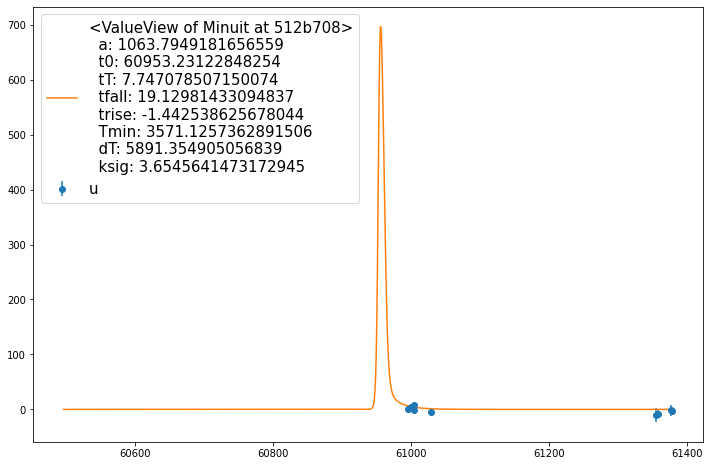

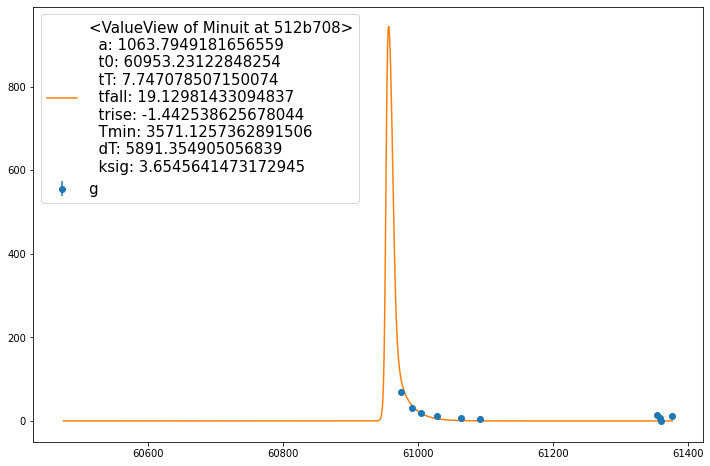

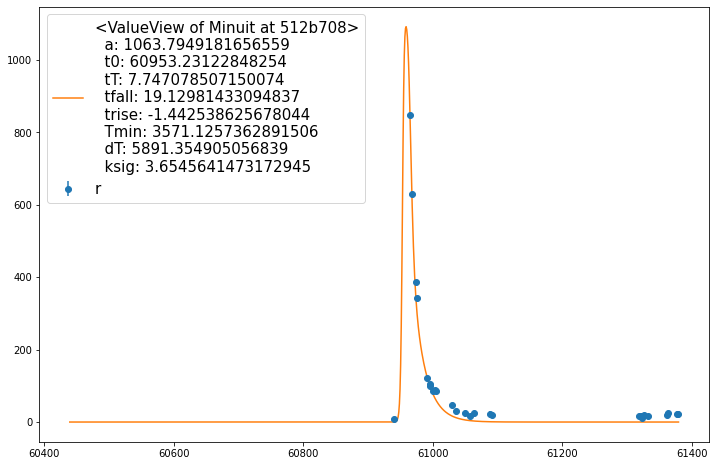

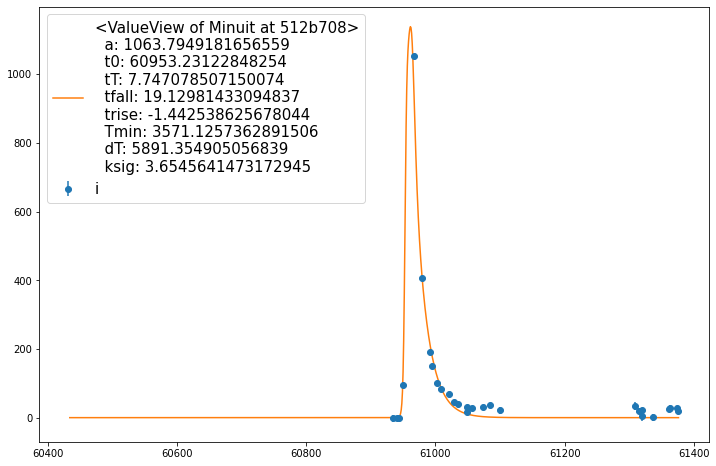

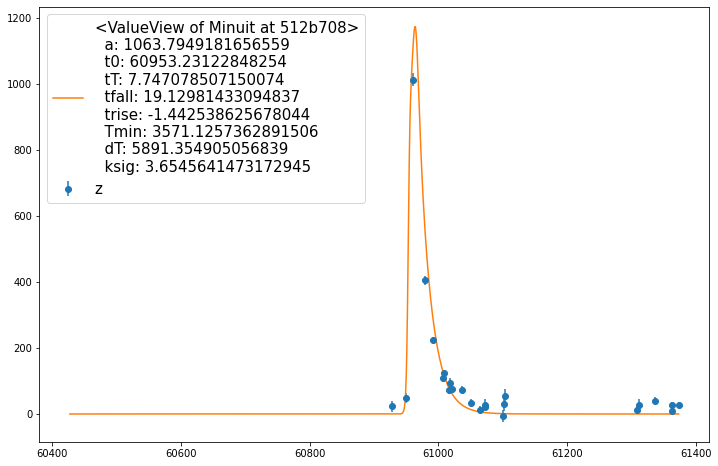

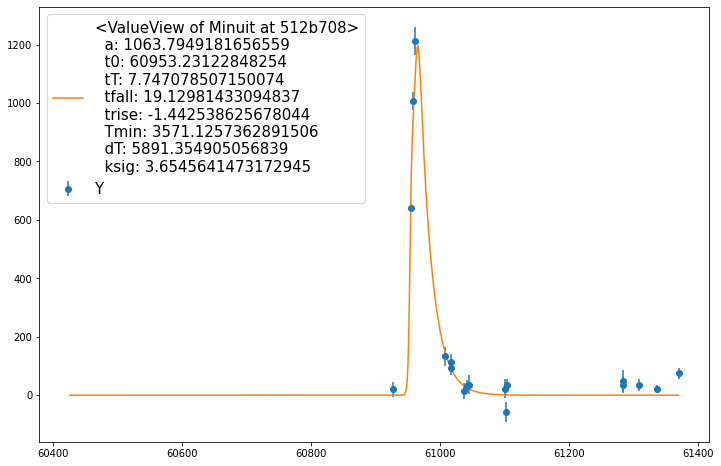

In [13]:
for band in ['u ','g ','r ','i ','z ','Y ']:

    plt.figure(figsize = (12, 8))
    obj = lcs[winner]

    single_band = obj[obj['BAND'] == band]
    flux = single_band['FLUXCAL']
    fluxerr = single_band['FLUXCALERR']
    mjd = single_band['MJD']

    xtime = np.linspace(mjd.min()-500, mjd.max(), 1000)
    x = np.array([xtime,[freq_dic.get(band)]*len(xtime)]).T

    plt.errorbar(mjd, flux, yerr=fluxerr, fmt='o', label = band)

    plt.plot(xtime, Fnu(x, **fit.values), label=fit.values)

    plt.legend(fontsize = 15)

# Draw a spectra of this object

In [14]:
import matplotlib as mpl

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#3B57C6' #blue
c2='#CB3F46'

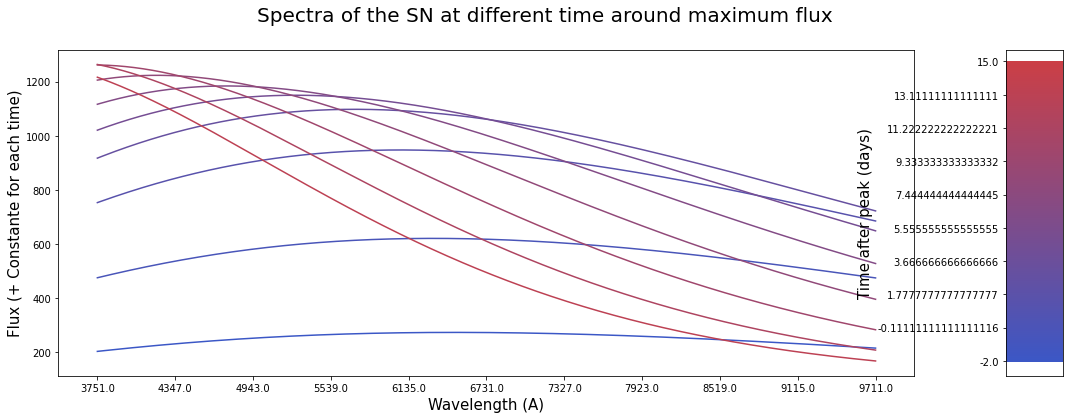

In [18]:
#############################
mini_time = -2
maxi_time = 15
nb_time = 10

mini_freq = nu_u
maxi_freq = nu_Y
nb_freq = 1000

ecart = 10
height = 8
n_xticks = 10
n_yticks = int(maxi_time-mini_time)+1
#############################

# Ensures a nice number f ticks
while n_yticks>11:
    n_yticks = int(n_yticks/2) + 1


all_freq = np.linspace(mini_freq, maxi_freq, nb_freq)
all_times = np.linspace(fit.values['t0']+mini_time, fit.values['t0']+maxi_time, nb_time)

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [15, 1]})
plt.suptitle('Spectra of the SN at different time around maximum flux', fontsize = 20)


for idx, time in enumerate(all_times):
    spectra = np.array([])
    for freq in all_freq:
        x = np.array([time, freq])
        spectra = np.append(spectra, Fnu(x, **fit.values))
    ax[0].plot(all_freq, spectra + (idx*ecart), color=colorFader(c1,c2,idx/len(all_times)))
    
tick_length = int((all_freq.max()-all_freq.min())/n_xticks)
tick_new = int((Am_to_Hz(all_freq).max()-Am_to_Hz(all_freq).min())/n_xticks)

ax[0].set_xticks(np.arange(all_freq.min(),all_freq.max(), tick_length))
ax[0].set_xticklabels(np.arange(Am_to_Hz(all_freq).min(),Am_to_Hz(all_freq).max(), tick_new)) #Rescale the axis to display wavelength
ax[0].set_xlabel('Wavelength (A)', fontsize = 15)
ax[0].set_ylabel('Flux (+ Constante for each time)', fontsize = 15)
    
n=1000
for x in range(n+1):
    ax[1].axhline(x, color=colorFader(c1,c2,x/n), linewidth=1)
    ax[1].set_ylabel('Time after peak (days)', fontsize = 15)
    plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    

plt.yticks(np.linspace(0,1000, n_yticks),np.linspace(mini_time,maxi_time, n_yticks)) #Rescale the axis to time after peak
fig.set_size_inches(18, 6)
plt.show()

In [40]:
lcs[winner].meta

OrderedDict([('SNID', b'11843335'),
             ('IAUC', b'NULL            '),
             ('FAKE', 2),
             ('RA', 69.55096474600587),
             ('DEC', -9.998492062306603),
             ('PIXSIZE', 0.2),
             ('NXPIX', -9),
             ('NYPIX', -9),
             ('SNTYPE', 11),
             ('NOBS', 116),
             ('PTROBS_MIN', 25515),
             ('PTROBS_MAX', 25630),
             ('MWEBV', 0.06662062),
             ('MWEBV_ERR', 0.0033310307),
             ('REDSHIFT_HELIO', 0.09258614),
             ('REDSHIFT_HELIO_ERR', 0.001),
             ('REDSHIFT_FINAL', 0.09242009),
             ('REDSHIFT_FINAL_ERR', 0.001),
             ('VPEC', 0.0),
             ('VPEC_ERR', 300.0),
             ('HOSTGAL_NMATCH', 0),
             ('HOSTGAL_NMATCH2', 0),
             ('HOSTGAL_OBJID', 10312500822),
             ('HOSTGAL_FLAG', 0),
             ('HOSTGAL_PHOTOZ', -9.0),
             ('HOSTGAL_PHOTOZ_ERR', -9.0),
             ('HOSTGAL_SPECZ', -9.0),
      